In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Reading data from CSV file

In [3]:
df = pd.read_csv('data3.csv')
sf = pd.read_csv('data3.csv')

In [4]:
df.describe()

,tmin,tmax,prcp,snow,snwd,awnd
count,1977.000000,1977.000000,1977.000000,1977.000000,1976.000000,1973.000000
mean,51.088012,72.298938,0.135771,0.012838,0.016953,6.074805
std,15.889527,15.796087,0.370521,0.227433,0.215338,2.954427
min,4.000000,27.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,60.000000,0.000000,0.000000,0.000000,3.800000
50%,52.000000,74.000000,0.000000,0.000000,0.000000,5.800000
75%,66.000000,86.000000,0.060000,0.000000,0.000000,7.800000
max,78.000000,102.000000,4.960000,7.000000,5.900000,20.360000


### Converting date column to datetime format

In [5]:
df['date'] = pd.to_datetime(df['date'])

### Extracting year, month, day, and dayofweek as new features

In [6]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek

### Preparing input data

In [7]:
X = df[['year', 'month', 'day', 'dayofweek']]
y_tmin = df['tmin']
y_tmax = df['tmax']

### Splitting data into train andtest sets

In [8]:
X_train, X_test, y_tmin_train, y_tmin_test, y_tmax_train, y_tmax_test = train_test_split(X, y_tmin, y_tmax, test_size=0.2, random_state=42)

### Training model for TMin using XGBoost

In [9]:
model_tmin = xgb.XGBRegressor()
model_tmin.fit(X_train, y_tmin_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### Training model for TMax using XGBoost

In [10]:
model_tmax = xgb.XGBRegressor()
model_tmax.fit(X_train, y_tmax_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### Predicting TMin and TMax for future days

In [11]:
num_days_future = 20
future = pd.DataFrame({'date': pd.date_range(start=df['date'].max(), periods=num_days_future+1)[1:]})
future['year'] = future['date'].dt.year
future['month'] = future['date'].dt.month
future['day'] = future['date'].dt.day
future['dayofweek'] = future['date'].dt.dayofweek
future_x = future[['year', 'month', 'day', 'dayofweek']]

tmin_forecast = model_tmin.predict(future_x)
tmax_forecast = model_tmax.predict(future_x)

### Evaluating the model with test data

In [12]:
tmin_test_forecast = model_tmin.predict(X_test)
tmax_test_forecast = model_tmax.predict(X_test)
tmin_error_percentage = mean_absolute_error(y_tmin_test, tmin_test_forecast) / y_tmin_test.mean() * 100
tmax_error_percentage = mean_absolute_error(y_tmax_test, tmax_test_forecast) / y_tmax_test.mean() * 100

### Preparing new DataFrame to display forecasts along with date and error percentage

In [13]:
forecast_df = pd.DataFrame({'Date': future['date'], 'TMin Forecast': tmin_forecast, 'TMax Forecast': tmax_forecast})
print(forecast_df)

         Date  TMin Forecast  TMax Forecast
0  2022-06-01      60.161125      90.284004
1  2022-06-02      64.368988      89.428185
2  2022-06-03      67.726151      92.548553
3  2022-06-04      66.364250      85.945663
4  2022-06-05      72.669861      86.750427
5  2022-06-06      81.166290      94.770088
6  2022-06-07      74.842346      91.646904
7  2022-06-08      71.074326      73.024239
8  2022-06-09      70.260567      71.323891
9  2022-06-10      66.376930      78.257378
10 2022-06-11      65.020782      83.541702
11 2022-06-12      65.656303      81.825737
12 2022-06-13      70.985214      92.344688
13 2022-06-14      61.839008      93.086639
14 2022-06-15      60.879349      90.241539
15 2022-06-16      72.327080      95.119614
16 2022-06-17      70.772850      94.050819
17 2022-06-18      77.675682      97.704964
18 2022-06-19      79.238945      98.639137
19 2022-06-20      68.340477      87.941071


In [14]:
forecast_df.describe()

,Date,TMin Forecast,TMax Forecast
count,20,20.000000,20.000000
mean,2022-06-10 12:00:00,69.387314,88.423752
min,2022-06-01 00:00:00,60.161125,71.323891
25%,2022-06-05 18:00:00,65.497423,85.344673
50%,2022-06-10 12:00:00,69.300522,90.262772
75%,2022-06-15 06:00:00,72.412775,93.327684
max,2022-06-20 00:00:00,81.166290,98.639137
std,NaN,5.877990,7.570753


### Printing the error percentage

In [15]:
print(f"TMin Error Percentage: {tmin_error_percentage}%")
print(f"TMax Error Percentage: {tmax_error_percentage}%")

TMin Error Percentage: 11.29424034075582%
TMax Error Percentage: 8.810488504599059%


In [16]:
cdf = df[['date','tmin','tmax','awnd']]
bbr = cdf.head(10)

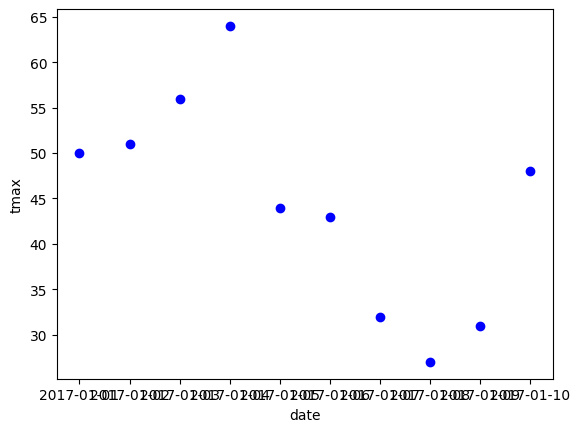

In [17]:
plt.scatter(bbr.date, bbr.tmax,  color='blue')
plt.xlabel("date")
plt.ylabel("tmax")
plt.show()

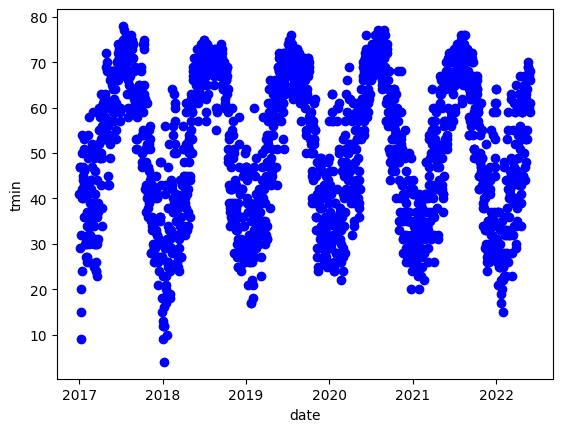

In [18]:
plt.scatter(cdf.date, cdf.tmin,  color='blue')
plt.xlabel("date")
plt.ylabel("tmin")
plt.show()

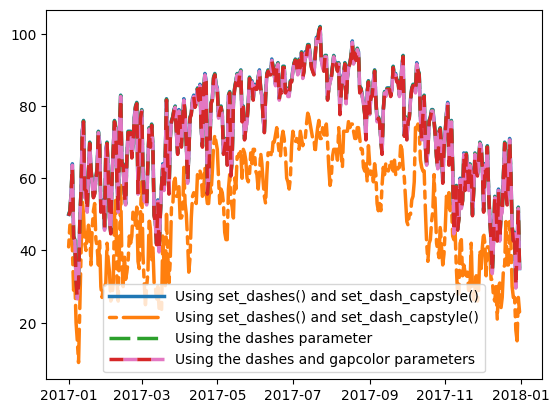

In [19]:
import numpy as np
import matplotlib.pyplot as plt
bbr1 = cdf.head(365)
x = bbr1['date']
y1 = bbr1['tmax']
y2 = bbr1['tmin']
plt.rc('lines', linewidth=2.5)
fig, ax = plt.subplots()

# Using set_dashes() and set_capstyle() to modify dashing of an existing line.
line1, = ax.plot(x, y1, label='Using set_dashes() and set_dash_capstyle()')
line1, = ax.plot(x, y2, label='Using set_dashes() and set_dash_capstyle()')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break.
line1.set_dash_capstyle('round')

# Using plot(..., dashes=...) to set the dashing when creating a line.
line2, = ax.plot(x, y1 - 0.2, dashes=[6, 2], label='Using the dashes parameter')

# Using plot(..., dashes=..., gapcolor=...) to set the dashing and
# alternating color when creating a line.
line3, = ax.plot(x, y1 - 0.4, dashes=[4, 4], gapcolor='tab:pink',
                 label='Using the dashes and gapcolor parameters')

ax.legend(handlelength=4)
plt.show()

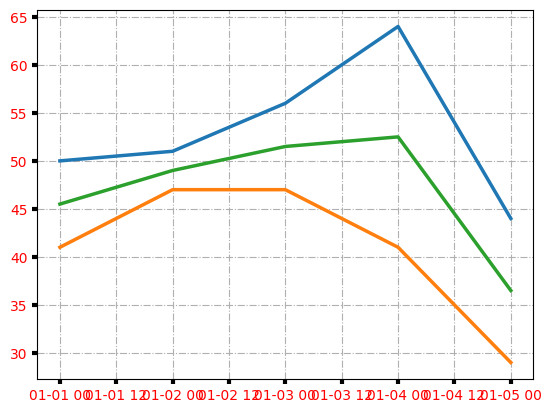

In [20]:
bbr2 = cdf.head(5)
t = bbr2['date']
s = bbr2['tmax']
c = bbr2['tmin']
b = (c + s)/2
fig, ax = plt.subplots()
ax.plot(t, s)
ax.plot(t, c)
ax.plot(t, b)
ax.grid(True, linestyle='-.')
ax.tick_params(labelcolor='r', labelsize='medium', width=3)

plt.show()

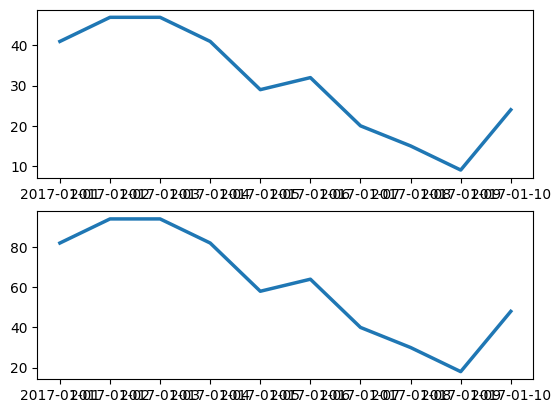

In [21]:
t = bbr['date']
s1 = bbr['tmin']
s2 = bbr['tmax']
plt.figure(1)
plt.subplot(211)
plt.plot(t, s1)
plt.subplot(212)
plt.plot(t, 2*s1)

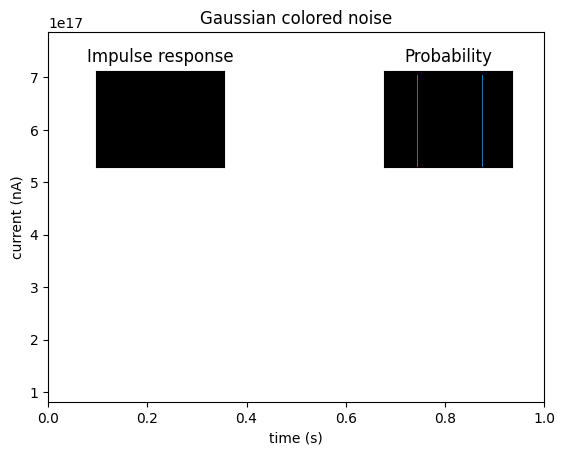

In [26]:
dt = 0.001
bbr2 = cdf.head(5)
t = bbr2['tmin']
r = bbr2['tmax']  # impulse response
x = bbr2['date']
s = np.convolve(x, r)[:len(x)] * dt  # colored noise

fig, main_ax = plt.subplots()
main_ax.plot(t, s)
main_ax.set_xlim(0, 1)
main_ax.set_ylim(1.1 * np.min(s), 2 * np.max(s))
main_ax.set_xlabel('time (s)')
main_ax.set_ylabel('current (nA)')
main_ax.set_title('Gaussian colored noise')

# this is an inset axes over the main axes
right_inset_ax = fig.add_axes([.65, .6, .2, .2], facecolor='k')
right_inset_ax.hist(s, 400, density=True)
right_inset_ax.set(title='Probability', xticks=[], yticks=[])

# this is another inset axes over the main axes
left_inset_ax = fig.add_axes([.2, .6, .2, .2], facecolor='k')
left_inset_ax.plot(t[:len(r)], r)
left_inset_ax.set(title='Impulse response', xlim=(0, .2), xticks=[], yticks=[])

plt.show()